## Multi Head Attention with Linear Layer
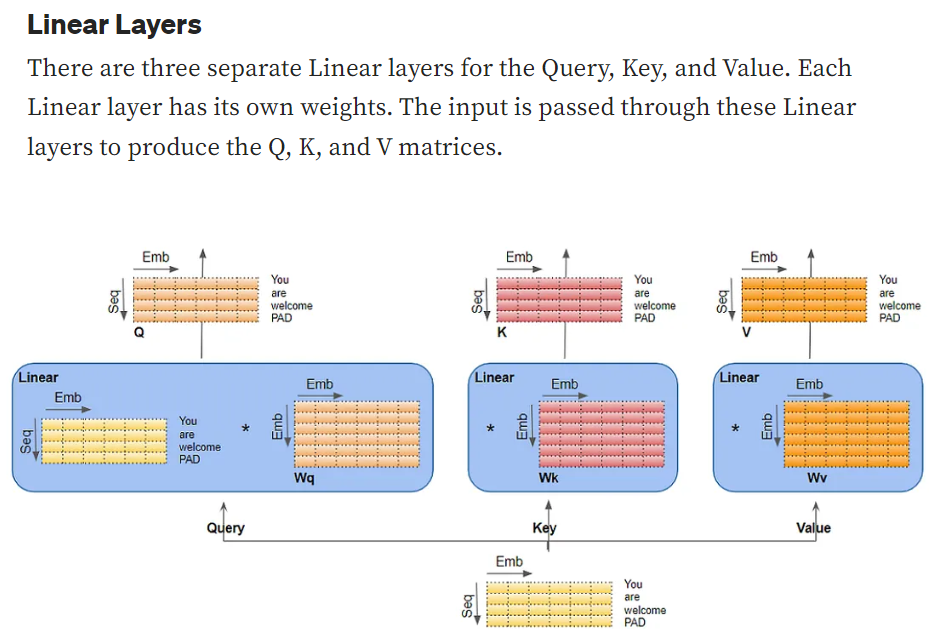
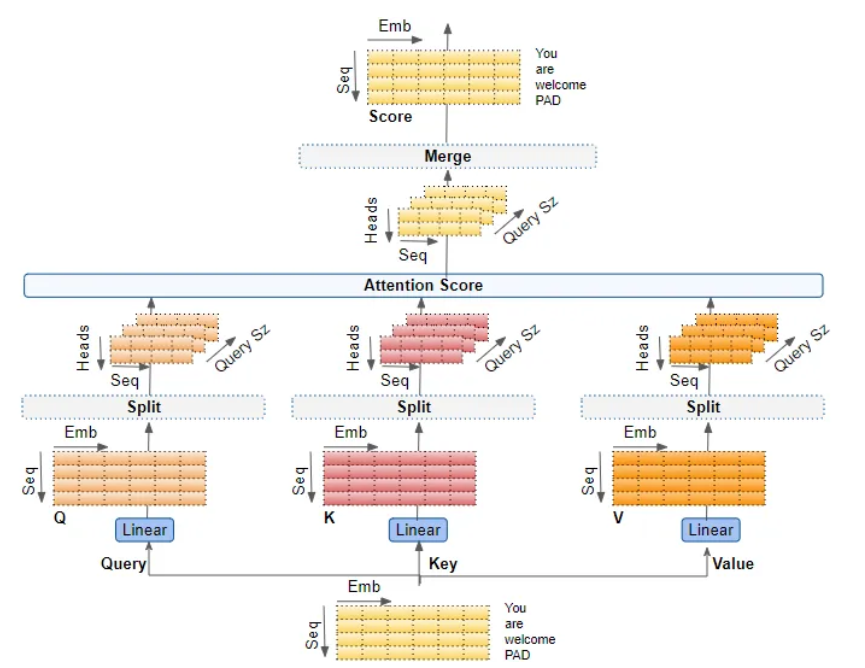

### Multi-Head Attention in Transformer Encoder: A Detailed Walkthrough

Let’s break down the multi-head attention mechanism within the Transformer encoder using a concrete example.

#### Example Scenario

Consider an input sentence "You are welcome". We'll walk through the process of computing the multi-head attention for this sentence in the Transformer encoder.

**Key Concepts:**

- **Embedding Size:** 6 (each word is represented by a 6-dimensional vector)
- **Query Size:** 3 (size of the vectors used by the Query layer)
- **Number of Attention Heads:** 2

### Steps:

1. **Input Preparation:**
    - Each word in "You are welcome" is converted to a 6-dimensional vector using the embedding layer.
    - Positional encoding is added to these vectors to capture word order information.

    Assume the embeddings (with positional encoding) for simplicity are:
    ```
    You: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    Are: [0.2, 0.1, 0.4, 0.5, 0.6, 0.3]
    Welcome: [0.3, 0.5, 0.6, 0.2, 0.1, 0.4]
    ```

2. **Creating the Spotlight Teams (Q, K, V):**
    - Three linear layers generate Query (Q), Key (K), and Value (V) matrices from the input embeddings.

    For simplicity, assume the linear transformations produce the following for each word:

    **Head 1:**
    ```
    Q(You): [0.1, 0.2, 0.3]
    K(You): [0.1, 0.2, 0.3]
    V(You): [0.1, 0.2, 0.3]

    Q(Are): [0.2, 0.1, 0.4]
    K(Are): [0.2, 0.1, 0.4]
    V(Are): [0.2, 0.1, 0.4]

    Q(Welcome): [0.3, 0.5, 0.6]
    K(Welcome): [0.3, 0.5, 0.6]
    V(Welcome): [0.3, 0.5, 0.6]
    ```

    **Head 2:**
    ```
    Q(You): [0.4, 0.5, 0.6]
    K(You): [0.4, 0.5, 0.6]
    V(You): [0.4, 0.5, 0.6]

    Q(Are): [0.5, 0.4, 0.7]
    K(Are): [0.5, 0.4, 0.7]
    V(Are): [0.5, 0.4, 0.7]

    Q(Welcome): [0.6, 0.7, 0.8]
    K(Welcome): [0.6, 0.7, 0.8]
    V(Welcome): [0.6, 0.7, 0.8]
    ```

3. **Shining the Spotlight (Attention Scores):**

Each head calculates attention scores independently. Let's focus on "You" as the target word.

**Head 1:**

- **Dot Product Calculations:**

    ```
    Dot product (Head 1, You, You) = 0.1 * 0.1 + 0.2 * 0.2 + 0.3 * 0.3
                                    = 0.01 + 0.04 + 0.09
                                    = 0.14
    ```

    ```
    Dot product (Head 1, You, Are) = 0.1 * 0.2 + 0.2 * 0.1 + 0.3 * 0.4
                                    = 0.02 + 0.02 + 0.12
                                    = 0.16
    ```

    ```
    Dot product (Head 1, You, Welcome) = 0.1 * 0.3 + 0.2 * 0.5 + 0.3 * 0.6
                                       = 0.03 + 0.10 + 0.18
                                       = 0.31
    ```

**Head 2:**

- **Dot Product Calculations:**

    ```
    Dot product (Head 2, You, You) = 0.4 * 0.1 + 0.5 * 0.2 + 0.6 * 0.3
                                    = 0.04 + 0.10 + 0.18
                                    = 0.32
    ```

    ```
    Dot product (Head 2, You, Are) = 0.4 * 0.2 + 0.5 * 0.1 + 0.6 * 0.4
                                    = 0.08 + 0.05 + 0.24
                                    = 0.37
    ```

    ```
    Dot product (Head 2, You, Welcome) = 0.4 * 0.3 + 0.5 * 0.5 + 0.6 * 0.6
                                       = 0.12 + 0.25 + 0.36
                                       = 0.73
    ```

## **Scaling by the Square Root of Query Size:**

**Head 1:**

   > 
    Scaled score (You, You) = 0.14 / sqrt(3) ≈ 0.081
    Scaled score (You, Are) = 0.16 / sqrt(3) ≈ 0.092
    Scaled score (You, Welcome) = 0.31 / sqrt(3) ≈ 0.179

**Head 2:**

> 
    Scaled score (You, You) = 0.32 / sqrt(3) ≈ 0.185
    Scaled score (You, Are) = 0.37 / sqrt(3) ≈ 0.213
    Scaled score (You, Welcome) = 0.73 / sqrt(3) ≈ 0.421


- **Applying Softmax:**

**Head 1:**

Scaled scores: [0.081, 0.092, 0.179]

    ```
    Softmax(0.081) = exp(0.081) / (exp(0.081) + exp(0.092) + exp(0.179))
                   ≈ 1.084 / (1.084 + 1.096 + 1.196)
                   ≈ 1.084 / 3.376
                   ≈ 0.321

    Softmax(0.092) = exp(0.092) / (exp(0.081) + exp(0.092) + exp(0.179))
                   ≈ 1.096 / (1.084 + 1.096 + 1.196)
                   ≈ 1.096 / 3.376
                   ≈ 0.325

    Softmax(0.179) = exp(0.179) / (exp(0.081) + exp(0.092) + exp(0.179))
                   ≈ 1.196 / (1.084 + 1.096 + 1.196)
                   ≈ 1.196 / 3.376
                   ≈ 0.354
    ```

**Head 2:**

Scaled scores: [0.185, 0.213, 0.421]

    ```
    Softmax(0.185) = exp(0.185) / (exp(0.185) + exp(0.213) + exp(0.421))
                   ≈ 1.203 / (1.203 + 1.238 + 1.523)
                   ≈ 1.203 / 3.964
                   ≈ 0.303

    Softmax(0.213) = exp(0.213) / (exp(0.185) + exp(0.213) + exp(0.421))
                   ≈ 1.238 / (1.203 + 1.238 + 1.523)
                   ≈ 1.238 / 3.964
                   ≈ 0.312

    Softmax(0.421) = exp(0.421) / (exp(0.185) + exp(0.213) + exp(0.421))
                   ≈ 1.523 / (1.203 + 1.238 + 1.523)
                   ≈ 1.523 / 3.964
                   ≈ 0.385
    ```


**Weighted Sum with Vectors (Continued):**

**Head 1:**

Attention weights: [0.321, 0.325, 0.354]

Value vectors for each word in Head 1:
```
You: [0.1, 0.2, 0.3]
Are: [0.2, 0.1, 0.4]
Welcome: [0.3, 0.5, 0.6]
```

Weighted sum:
```
Weighted sum (Head 1, You) = 0.321 * [0.1, 0.2, 0.3] + 0.325 * [0.2, 0.1, 0.4] + 0.354 * [0.3, 0.5, 0.6]
                            ≈ [0.0321, 0.0642, 0.0963] + [0.0650, 0.0325, 0.1300] + [0.1062, 0.1770, 0.2124]
                            ≈ [0.2033, 0.2737, 0.4387]
```

**Head 2:**

Attention weights: [0.303, 0.312, 0.385]

Value vectors for each word in Head 2:
```
You: [0.4, 0.5, 0.6]
Are: [0.5, 0.4, 0.7]
Welcome: [0.6, 0.7, 0.8]
```

Weighted sum:
```
Weighted sum (Head 2, You) = 0.303 * [0.4, 0.5, 0.6] + 0.312 * [0.5, 0.4, 0.7] + 0.385 * [0.6, 0.7, 0.8]
                            ≈ [0.1212, 0.1515, 0.1818] + [0.1560, 0.1248, 0.2184] + [0.2310, 0.2695, 0.3080]
                            ≈ [0.5082, 0.5458, 0.7074]
```

**Output:**

The final output vectors for "You" from each attention head are:
- Head 1: [0.2033, 0.2737, 0.4387]
- Head 2: [0.5082, 0.5458, 0.7074]

These vectors from different attention heads will be concatenated and passed through another linear layer to obtain the final output representation for the word "You" in the Transformer encoder.

In [44]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

In [45]:
seq_length = 4 # max input length
batch_size = 1
d_modle = 512 # input embedding size of each word
d_k = 512 # q,k,v dimensions
x = torch.randn((batch_size,seq_length,d_model))
x.shape

torch.Size([1, 4, 512])

In [46]:
## Linear layer for q,k,v

qkv_layer = nn.Linear(d_model, 3 * d_k)
qkv = qkv_layer(x)
qkv.shape

torch.Size([1, 4, 1536])

Text(0.5, 1.0, 'QKV Distribution')

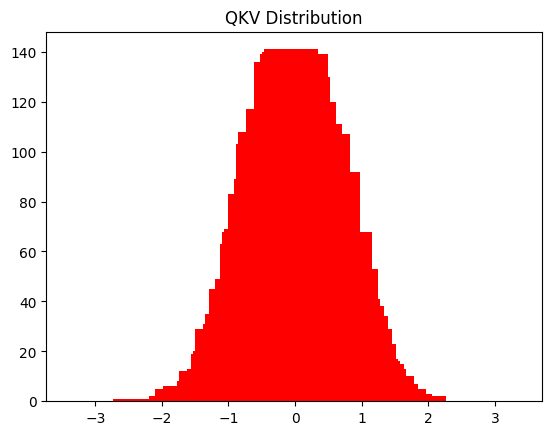

In [47]:
## QKV distribution 
import matplotlib.pyplot as plt
y_val = torch.histc(qkv,bins=200,min=-3,max=3)
x_val = np.arange(-1,1,0.01)*3
plt.bar(x_val,y_val,align='center',color='red')
plt.title("QKV Distribution")

In [48]:
num_heads = 8
head_dim = d_k // num_heads
print("initial shape ",qkv.shape)
qkv = qkv.reshape(batch_size,seq_length,num_heads, 3 *  head_dim)
print("new   shape   ",qkv.shape)

initial shape  torch.Size([1, 4, 1536])
new   shape    torch.Size([1, 4, 8, 192])


In [49]:
q, k, v = qkv.chunk(3,dim=-1)
q.shape,k.shape,v.shape

(torch.Size([1, 4, 8, 64]),
 torch.Size([1, 4, 8, 64]),
 torch.Size([1, 4, 8, 64]))

In [50]:
d_q = q.size()[-1]
scaled = torch.matmul(q,k.transpose(-2,-1)) / math.sqrt(d_k)
scaled.shape

torch.Size([1, 4, 8, 8])

In [51]:
 # mask if needed
mask = torch.full(scaled.size(),float('-inf'))
mask = torch.triu(mask,diagonal=1)
print(mask.shape,'\n',mask[0][1])


torch.Size([1, 4, 8, 8]) 
 tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [52]:
scaled += mask
scaled[0][0]

tensor([[-0.1978,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-0.0034, -0.0181,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-0.2188, -0.1132,  0.1496,    -inf,    -inf,    -inf,    -inf,    -inf],
        [-0.0525, -0.1394,  0.2374, -0.1405,    -inf,    -inf,    -inf,    -inf],
        [ 0.0930,  0.0787,  0.0094, -0.0257, -0.0781,    -inf,    -inf,    -inf],
        [-0.0240,  0.0666,  0.0151,  0.2133,  0.2113, -0.2195,    -inf,    -inf],
        [-0.0127,  0.0562, -0.2131,  0.0447, -0.1586, -0.1220, -0.0849,    -inf],
        [-0.2005, -0.0064, -0.1156, -0.1087, -0.1301,  0.0268, -0.0943, -0.1190]],
       grad_fn=<SelectBackward0>)

In [53]:
attention = F.softmax(scaled,dim=-1)
print(attention.shape)
attention[0][0]

torch.Size([1, 4, 8, 8])


tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5037, 0.4963, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2811, 0.3125, 0.4064, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2399, 0.2199, 0.3206, 0.2197, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2157, 0.2126, 0.1984, 0.1915, 0.1818, 0.0000, 0.0000, 0.0000],
        [0.1541, 0.1687, 0.1602, 0.1953, 0.1950, 0.1267, 0.0000, 0.0000],
        [0.1506, 0.1613, 0.1233, 0.1595, 0.1302, 0.1350, 0.1401, 0.0000],
        [0.1121, 0.1361, 0.1220, 0.1228, 0.1202, 0.1407, 0.1246, 0.1216]],
       grad_fn=<SelectBackward0>)

In [54]:
values = torch.matmul(attention,v)
values.shape

torch.Size([1, 4, 8, 64])

In [55]:
## Summing up

def scaled_dot_product(q,k,v,mask=None):
    d_q = q.shape[-1]
    scaled = torch.matmul(q,k.transpose(-2,-1))/math.sqrt(d_q)
    if mask is not None:
        scaled+= mask
    attention = F.softmax(scaled,dim=-1)
    values = torch.matmul(attention,v)
    return values,attention

In [56]:
values,attention = scaled_dot_product(q,k,v,mask)

In [58]:
attention.shape

torch.Size([1, 4, 8, 8])

In [59]:
values.shape

torch.Size([1, 4, 8, 64])

In [62]:
values = values.reshape(batch_size,seq_length, num_heads*head_dim)
values.shape

torch.Size([1, 4, 512])

In [63]:
linear_layer = nn.Linear(d_k,d_k)

In [64]:
out = linear_layer(values)
out.shape

torch.Size([1, 4, 512])

In [79]:
import torch
import torch.nn as nn
import math

def scaled_dot_product(q,k,v,mask=None):
    d_q = q.shape[-1]
    scaled = torch.matmul(q,k.transpose(-2,-1))/math.sqrt(d_q)
    if mask is not None:
        scaled+= mask
    attention = F.softmax(scaled,dim=-1)
    values = torch.matmul(attention,v)
    return values,attention


class MultiheadAttention(nn.Module):
    def __init__(self,input_dim,d_model,num_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(input_dim,3*d_model)
        self.linear_layer = nn.Linear(d_model,d_model)

    def forward(self,x,mask=None):
        batch_size, seq_length, input_dim = x.size()
        print("x_size",x.size())
        qkv = self.qkv_layer(x)
        print("qkv size ",qkv.size())
        qkv = qkv.reshape(batch_size,seq_length,self.num_heads,3*self.head_dim)
        print("qkv size ",qkv.size())
        qkv = qkv.permute(0,2,1,3)
        print("qkv size ",qkv.size())
        q, k, v = qkv.chunk(3,dim=-1)
        print(q.shape,k.shape,v.shape)
        values,attention = scaled_dot_product(q, k, v, mask)
        print("value size",values.shape, "Attention size", attention.shape)
        values = values.reshape(batch_size,seq_length,self.num_heads*self.head_dim)
        print("value size", values.shape)
        out = self.linear_layer(values)
        print("out size", out.shape)
        return out


In [80]:
input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 32
seq_length = 5
x = torch.randn((batch_size,seq_length,input_dim))
model = MultiheadAttention(input_dim,d_model,num_heads)
out = model.forward(x)

x_size torch.Size([32, 5, 1024])
qkv size  torch.Size([32, 5, 1536])
qkv size  torch.Size([32, 5, 8, 192])
qkv size  torch.Size([32, 8, 5, 192])
torch.Size([32, 8, 5, 64]) torch.Size([32, 8, 5, 64]) torch.Size([32, 8, 5, 64])
value size torch.Size([32, 8, 5, 64]) Attention size torch.Size([32, 8, 5, 5])
value size torch.Size([32, 5, 512])
out size torch.Size([32, 5, 512])
